<a href="https://colab.research.google.com/github/msestero/Bio448GroupProject/blob/main/bio_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import pandas as pd
#import plotly.graph_objects as go
import networkx as nx
#import matplotlib.pyplot as plt

In [ ]:
def get_search_json(disease):
  search_url = "http://106.15.232.250/advancedSearch.php"
  payload = {"term":f"'{disease}'[disease]","num":"1","step":"1"}
  resp = requests.post(search_url, json=payload)
  resp_json = json.loads(resp.text)
  return resp_json

In [ ]:
def disease_ids(resp_json):
  nodes = resp_json["data"]["nodes"]
  res = []
  for node in nodes:
    if node["type"] == "disease":
      res.append(node["id"])
  return res

In [ ]:
def create_connections(resp_json):
  links = resp_json["data"]["links"]
  res = []
  for link in links:
    if link["relation"] != "cause":
      res.append((link["source"], link["target"], link["weight"]))
  return res

In [ ]:
def node_dict(resp_json):
  nodes = resp_json["data"]["nodes"]
  res = {}
  for node in nodes:
    res[node["id"]] = node
  return res

In [ ]:
def create_graphs(resp_json):
  edges = create_connections(resp_json)
  nodes = node_dict(resp_json)
  ids = disease_ids(resp_json)
  graphs = {}
  for id in ids:
    graphs[id] = nx.Graph()

  max_len = 10
  for edge in edges:
    name1 = nodes[edge[0]]["name"]
    type1 = nodes[edge[0]]["type"]
    node1 = f"{name1[:max_len]}\n{type1}"

    name2 = nodes[edge[1]]["name"]
    type2 = nodes[edge[1]]["type"]
    node2 = f"{name2[:max_len]}\n{type2}"
    weight = 1/edge[2] * 3000
    if edge[0] in graphs.keys():
      if node1 not in graphs[edge[0]].nodes():
        graphs[edge[0]].add_node(node1, _type=nodes[edge[0]]["type"])
      if node2 not in graphs[edge[0]].nodes():
        graphs[edge[0]].add_node(node2, _type=nodes[edge[1]]["type"])
      graphs[edge[0]].add_edge(node1, node2, weight=weight)
    if edge[1] in graphs.keys():
      if node1 not in graphs[edge[1]].nodes():
        graphs[edge[1]].add_node(node1, _type=nodes[edge[0]]["type"])
      if node2 not in graphs[edge[1]].nodes():
        graphs[edge[1]].add_node(node2, _type=nodes[edge[1]]["type"])
      graphs[edge[1]].add_edge(node1, node2, weight=weight)
  return graphs

In [ ]:
def disease_graph(disease):
  resp_json = get_search_json(disease)
  return create_graphs(resp_json)

In [ ]:
graphs = disease_graph("Cowden Disease")
keys = list(graphs.keys())

In [ ]:
def show_graph(graph):
  plt.figure(3,figsize=(12,12))
  colors = []
  sizes = []
  for node in graph.nodes(data=True):
    if node[1]["_type"] == "disease":
      colors.append("#6F686D")
      sizes.append(10000)
    elif node[1]["_type"] == "gene":
      colors.append("#E0D3DE")
      edges = graph.edges(node[0], data=True)
      edge = list(edges)[0]
      weight = edge[2]["weight"]
      sizes.append(weight)
    else:
      colors.append("#CBB8A9")
      edges = graph.edges(node[0], data=True)
      edge = list(edges)[0]
      weight = edge[2]["weight"]
      sizes.append(weight)
  nx.draw(graph, 
          with_labels=True, 
          node_size=sizes,
          node_color=colors,
          alpha=0.9)
  plt.show()

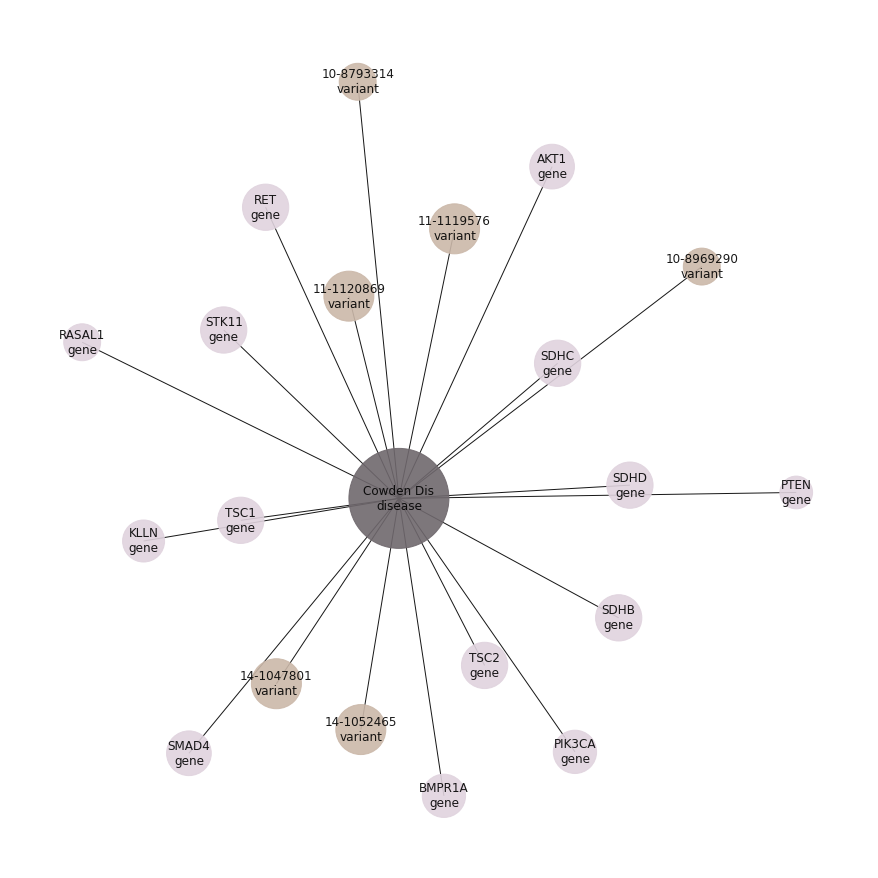

In [ ]:
show_graph(graphs[keys[0]])